In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
def select_random_points(img, n=100):
    X, Y = np.shape(img)
    x_sample, y_sample = random.sample(range(X), n), random.sample(range(Y), n)
    
    return tuple(zip(x_sample, y_sample))

In [3]:
def sdev_area(img, x, y, r):
    if x - r < 0 or y - r < 0 or x + r >= img.shape[0] or y + r >= img.shape[1]:
        return None
    
    testarea = img[x - r: x + r, y - r: y + r]
    return np.std(testarea)

def slope_area(img, x, y, r):
    if x - r < 0 or y - r < 0 or x + r >= img.shape[0] or y + r >= img.shape[1]:
        return None
    
    testarea = img[x - r: x + r, y - r: y + r]
    
    xgrid, ygrid = np.meshgrid(range(-r, r), range(-r, r))
    
    #this defines the X vector to perform Linear Regression using least squares method
    # Ax + By + C = z
    # so X[:,0] is all the multipliers of A, X[:,1] is all the multipliers of B, X[:,2] is all 1s because C has constant multipliers
    X = np.stack([xgrid.ravel(), ygrid.ravel()], axis=1)
    X = np.hstack([X, np.ones((X.shape[0], 1))])

    #this defines the y vector to perform Linear Regression (however y is taken so i am using Z)
    Z = testarea.ravel()

    coeffs, _, _, _ = np.linalg.lstsq(X, Z, rcond=None)
    
    A, B, C = coeffs
    slope = np.sqrt(A**2 + B**2)
    
    return slope

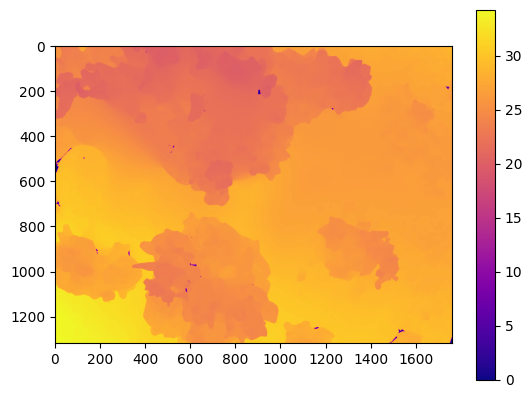

In [4]:
img = np.load("depth_sample/6.npy")
a = plt.imshow(img, cmap="plasma")
plt.colorbar(a)
plt.show()

Slope: 0.005856772778855365
Roughness: 0.04130364581942558


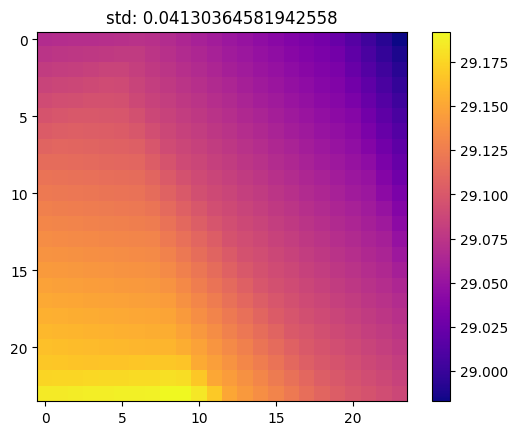

In [5]:
testpt = (620, 200)
r = 12

print(f"Slope: {slope_area(img, testpt[0], testpt[1], r)}\nRoughness: {sdev_area(img, testpt[0], testpt[1], r)}")

testarea = img[testpt[0] - r: testpt[0] + r, testpt[1] - r: testpt[1] + r]
a = plt.imshow(testarea, cmap="plasma")
plt.title(f"std: {np.std(testarea)}")
plt.colorbar(a)
plt.show()

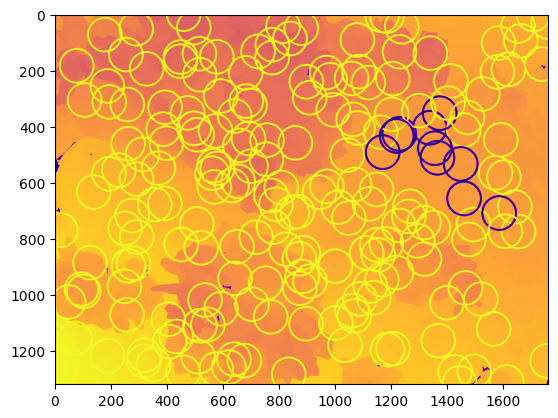

In [6]:
r = 60
slope_cutoff = 0.01
roughness_cutoff = 0.1

points = select_random_points(img, n=200)
img_circle = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

for px, py in points:
    slope = slope_area(img, px, py, r)
    roughness = sdev_area(img, px, py, r)
    
    color = (255,0,0)
    if slope is not None and roughness is not None:
        color = (255, 0, 0)
        
        if (slope <= slope_cutoff) and (roughness <= roughness_cutoff):
            color = (0, 255, 0)
    
    img_circle = cv2.circle(img_circle, (py, px), r, color, 5)

plt.imshow(img_circle, cmap="plasma")
plt.show()